# 項目反応理論

## モデル

$i$番目の被験者の$j$番目の項目の値$y_{ij}$が二値$\{0, 1\}$であるとする（例えば正解・不正解だったり、アンケートの「あてはまる」「あてはまらない」という2件法など）。

$y_{ij}$の背後には潜在的な能力の連続量$\theta_i \in \mathbb{R}$が存在し、$\theta_i$が閾値$\beta_j$を超えていたら1、超えていなければ0が観測されるとする。つまり$y_{ij}$が以下のように決まるとする。

$$
y_{ij}
= \begin{cases}
0 & \text{ if } \theta_i < \beta_j\\
1 & \text{ if } \theta_i \geq \beta_j\\
\end{cases}
$$

## 正規累積モデル


### 1パラメータ正規累積モデル

しかし、実際には被験者$i$の体調や運（たまたま正解できた）などにより、常にこのようにきれいに正解・不正解が決まるわけではないと考えられる。こうした誤差を表すパラメータ$\varepsilon_{ij} \sim N(0, \sigma^2_{\varepsilon})$も追加して

$$
y_{ij}
= \begin{cases}
0 & \text{ if } (\theta_i - \varepsilon_{ij}) < \beta_j\\
1 & \text{ if } (\theta_i - \varepsilon_{ij}) \geq \beta_j\\
\end{cases}
$$

とする。誤差が確率変数のため、$y_{ij}$のとる値も確率変数として考えることができるようになる。$\beta_j$を移項すると

$$
y_{ij}
= \begin{cases}
0 & \text{ if } (\theta_i - \varepsilon_{ij} - \beta_j) < 0\\
1 & \text{ if } (\theta_i - \varepsilon_{ij} - \beta_j) \geq 0\\
\end{cases}
$$

となる。$\theta_i - \varepsilon_{ij} - \beta_j \sim N(\theta_i - \beta_j, \sigma^2_{\varepsilon})$である。
$\varepsilon_{ij}$を移項すれば

$$
y_{ij}
= \begin{cases}
0 & \text{ if } (\theta_i - \beta_j) < \varepsilon_{ij}\\
1 & \text{ if } (\theta_i - \beta_j) \geq \varepsilon_{ij}\\
\end{cases}
$$

でもあるので「$y_{ij}=1$となるのは誤差$\varepsilon_{ij}$が$\theta_i - \beta_j$以下のとき」とわかる。

仮に$\varepsilon_{ij}$が標準正規分布（$\sigma^2_{\varepsilon} = 1$の正規分布）に従うならば、特性値$\theta_i$の人が項目$j$に当てはまると回答する確率は

$$
\begin{aligned}
P(y_{ij} = 1)
&= P(\varepsilon_{ij} \leq \theta_i - \beta_j)\\
&= \int_{-\infty}^{\left(\theta_i-\beta_j\right)} \frac{1}{\sqrt{2 \pi}} \exp \left(-\frac{z^2}{2}\right) d z
\end{aligned}
$$

となる（最後のは、$\varepsilon_{ij}$が従う標準正規分布のうち $-\infty$ から $ｋ\theta_i-\beta_j$ までの範囲の面積が$P(\varepsilon_{ij} \leq \theta_i - \beta_j)$ということ）。



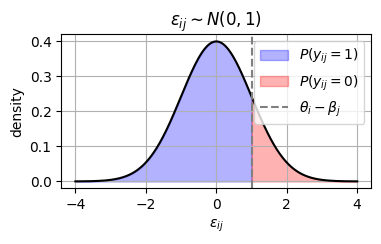

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
epsilon = np.linspace(-4, 4, 1000)
y = norm.pdf(epsilon)
fig, ax = plt.subplots(figsize=[4,2])
ax.plot(epsilon, y, 'k-')

c = 1

ax.fill_between(epsilon, y, where=(epsilon < c), color='blue', alpha=0.3, label=r'$P(y_{ij} = 1)$')
ax.fill_between(epsilon, y, where=(epsilon >= c), color='red', alpha=0.3, label=r'$P(y_{ij} = 0)$')
ax.axvline(x=c, color='grey', linestyle='--', label=r'$\theta_i - \beta_j$')
ax.set(
    title=r'$\varepsilon_{ij} \sim N(0, 1)$',
    xlabel=r"$\varepsilon_{ij}$",
    ylabel="density"
)
ax.legend()
ax.grid(True)
fig.show()

### 2パラメータ正規累積モデル

$\sigma^2_{\varepsilon}$が項目ごとに異なる場合を考える。$\sigma^2_{\varepsilon}=1/\alpha_j$とすると、誤差の確率分布は

$$
\varepsilon_{ij} \sim N\left(0, \frac{1}{\alpha_j}\right)
$$

となる。両辺を$\alpha_j$倍すると、$\alpha_j \varepsilon_{ij} \sim N(0, 1)$と表すことができ、引き続き標準正規分布を使うことができる。そのためモデルは$\alpha_i$が追加され

$$
\begin{aligned}
P(y_{ij} = 1)
&= P(\alpha_j \varepsilon_{ij} \leq \theta_i - \beta_j)\\
&= \int_{-\infty}^{ \alpha_j  (\theta_i-\beta_j)} \frac{1}{\sqrt{2 \pi}} \exp \left(-\frac{z^2}{2}\right) d z
\end{aligned}
$$

となる。

:::{admonition} パラメータの意味
:class: info

$\beta_j$が大きくなると$\theta_i - \beta_j$の値は小さくなり、$P(y_{ij} = 1)$の面積が小さくなる。$y_{ij} = 1$が正解を表しているとするなら、正答率が低くなる方向に作用する。そのため$\beta_j$は **項目困難度（item difficulty）** と呼ばれる。

また$\alpha_j$は値が大きくなると$\varepsilon_{ij}$の分散を下げて分布がより尖っていく。また横軸に$\theta_i - \beta_j$、縦軸に$P(y_{ij} = 1)$のグラフを書くとき、この曲線の傾きを急にして、$\theta_i$が低い人と高い人の間で$P(y_{ij} = 1)$の変化を大きくする。そのため$\alpha_j$は **項目識別力（item discrimination）** と呼ばれる。


:::

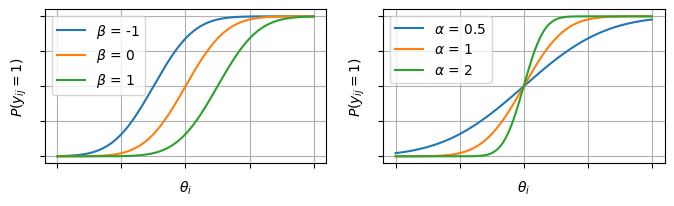

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
x = np.linspace(-4, 4, 1000)

fig, axes = plt.subplots(figsize=[8, 2], ncols=2)


alpha = 1
for beta in [-1, 0, 1]:
    axes[0].plot(x, norm.cdf(x, loc=beta, scale=1/alpha), label=r"$\beta$ = " + f"{beta}")
axes[0].set(xlabel=r"$\theta_i$", ylabel=r"$P(y_{ij} = 1)$", xticklabels=[], yticklabels=[])
axes[0].legend()
axes[0].grid(True)

beta = 0
for alpha in [0.5, 1, 2]:
    axes[1].plot(x, norm.cdf(x, loc=beta, scale=1/alpha), label=r"$\alpha$ = " + f"{alpha}")
axes[1].set(xlabel=r"$\theta_i$", ylabel=r"$P(y_{ij} = 1)$", xticklabels=[], yticklabels=[])
axes[1].legend()
axes[1].grid(True)

fig.show()

なお横軸に$\theta_i$、縦軸に$P(y_{ij}=1)$をとったグラフは **項目特性曲線 （item characteristic curve: ICC）** と呼ばれる。

## ロジスティックモデル

正規累積モデルはプロビット回帰と同様のことをするので、コンピュータで積分計算をするのがやや難しいという問題がある。そこでロジスティック分布に置き換えたものが使われる。

ロジスティック分布の確率密度関数と累積分布関数は

$$
f(x)=\frac{\exp (-x)}{[1+\exp (-x)]^2}, \quad F(x)=\frac{1}{1+\exp (-x)}
$$

となる。とくに$x$を約1.7倍したロジスティック分布は累積分布関数が正規分布と非常に近くなることが知られている。

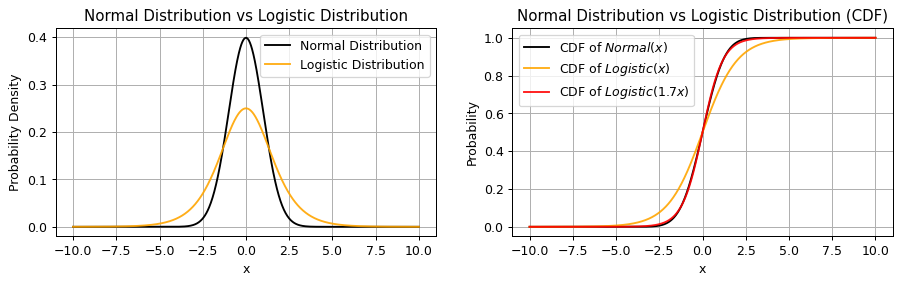

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, logistic
x = np.linspace(-10, 10, 1000)

fig, axes = plt.subplots(figsize=[12, 3], dpi=90, ncols=2)
ax = axes[0]
ax.plot(x, norm.pdf(x), 'k-', label='Normal Distribution')
ax.plot(x, logistic.pdf(x),  'orange', alpha=0.9, label='Logistic Distribution')

ax.set_title('Normal Distribution vs Logistic Distribution')
ax.set_xlabel('x')
ax.set_ylabel('Probability Density')
ax.legend()
ax.grid(True)

ax = axes[1]
ax.plot(x, norm.cdf(x), 'k-', label=r'CDF of $Normal(x)$')
ax.plot(x, logistic.cdf(x), 'orange', alpha=0.9, label=r'CDF of $Logistic(x)$')
ax.plot(x, logistic.cdf(x * 1.704), 'red', alpha=0.9, label=r'CDF of $Logistic(1.7 x)$')
ax.set_title('Normal Distribution vs Logistic Distribution (CDF)')
ax.set_xlabel('x')
ax.set_ylabel('Probability')
ax.legend()
ax.grid(True)
plt.show()

### 2PLモデル

正規分布の代わりにロジスティック分布を使った **2パラメータロジスティック（2PL）モデル** は

$$
P(y_{ij} = 1)
= \frac{1}{1+ \exp(-1.7\alpha_j \big( \theta_i - \beta_j) \big)}
$$

と表される。なお1.7は正規累積モデルに近づけるための定数なので、正規累積モデルと比較する必要がなければ不要。

### 3PLモデル

例えば4択問題では、正解がわからなくて適当に選んだとしても1/4は当たることになる。こうした影響を「当て推量」パラメータ$c_j$として取り入れたモデル。

$$
P(y_{ij} = 1)
= c_j + \frac{1 - c_j}{1 - \exp(-\alpha_j \big( \theta_i - \beta_j) \big)}
$$

$c_j$は項目特性曲線の下限となる。$\theta_i$がどんなに低い人でも必ず$c_j$以上の$P(y_{ij} = 1)$になるということ。


### 4PLモデル

項目特性曲線の上限を表すパラメータ$d_j$を追加したもの。$\theta_i$がどんなに高い人でも100%の正答率にはできない高難度な状況（運ゲー）を想定したモデル。

$$
P(y_{ij} = 1)
= c_j + \frac{d_j - c_j}{1 - \exp(-\alpha_j \big( \theta_i - \beta_j) \big)}
$$


### 5PLモデル

「非対称性」のパラメータ$e_j$を追加したもの。4PLまでは項目特性曲線の動き方が0.5を中心に対称になっている。5PLでは「最初は$\theta_i$があがるほど急激に$P(y_{ij}=1)$が上がるが、徐々に上がりにくくなる」などの状況を表すことができる。

$$
P(y_{ij} = 1)
= c_j + \frac{d_j - c_j}{\left[ 1 - \exp(-\alpha_j \big( \theta_i - \beta_j) \big) \right]^{e_j}}
$$


:::{admonition} 因子分析と2P正規累積モデルは等価
:class: tip

因子分析と2パラメータ正規累積モデルは数学的に等価であると知られている。標準化していない（切片が0でない）1因子モデルは、

$$
y_{ij} = \tau_j +  a_j f_i - \varepsilon_{ij}
\quad (\varepsilon_{ij}\sim N(0, \sigma_{\varepsilon}))
$$

となる（IRTの説明に合わせて誤差の符号をマイナスにしている）

カテゴリカル因子分析では離散的な観測変数$y_{ij}$はその背後にある連続量によって決まる、という考え方をするため、IRTの冒頭の説明と同じ。

標準正規分布に従う誤差$\varepsilon_{ij}$が$\tau_j +  a_j f_i$より小さいときに$y_{ij}=1$となるため、その確率$P(y_{ij}=1)$は

$$
\begin{aligned}
P(y_{ij} = 1)
&= P(\varepsilon_{ij} \leq \tau_j +  a_j f_i)\\
&= \int_{-\infty}^{ (\tau_j +  a_j f_i)} \frac{1}{\sqrt{2 \pi}} \exp \left(-\frac{z^2}{2}\right) d z
\end{aligned}
$$

となる。2つのモデルのパラメータを$(f_i, a_j, \tau_j) = (\theta_i, \alpha_j, \alpha_j \beta_j)$と対応させると

$$
\begin{aligned}
\tau_j +  a_j f_i
&= a_j \left( f_i + \frac{\tau_j}{a_j} \right) \\
&= \alpha_j (\theta_i - \beta_i)
\end{aligned}
$$

となる。
:::

## 多値型モデル

項目の反応$y_{ij}$が多値になった場合のモデルも存在する。

### 段階反応モデル

**段階反応モデル（graded response model: GRM）** は複数の二値IRTモデルを組み合わせて多値反応を表現する。

回答者$i$の項目$j$に対する回答$y_{ij} = k \quad (k=1,2,\dots,K)$について、「$k$以上のカテゴリを選ぶ確率」を考えると、これはまだ「$k$未満 or $k$以上」の二値なので2PLなどで表せる。例えば以下のようになる。

$$
P(y_{ij} \geq k)
= \frac{1}{1+ \exp(-\alpha_j \big( \theta_i - \beta_{jk}) \big)}
$$

なお、困難度は項目$j$のカテゴリ$k$ごとに用意されるため$\beta_{jk}$に変更している。


このモデルを組み合わせると、「ちょうど$k$番目のカテゴリを選ぶ確率」は

$$
P(y_{ij} = k)
= P(y_{ij} \geq k) - P(y_{ij} \geq k + 1)
$$

と表すことができる。ただし端のカテゴリは$P(y_{ij} \geq 1) = 1, P(y_{ij} \geq K + 1) = 0$とする。また確率100%の困難度は低くて当然なので$\beta_{j1} = -\infty$とする。


他の有名な多値型モデルには **一般化部分採点モデル** があるが、本質的に違いはない。

## 適合度の評価

### 局所独立性の確認

- $\chi^2$統計量

### 個人適合度

「$\theta_i$が高い人なのに困難度が低い項目で間違えるのはおかしい」といった考え方から、特性$\theta_i$と困難度$\beta_j$の関係性を見る。

- **$z_h$（$l_z$）統計量** ：ある回答者の反応パターン$\boldsymbol{y}_i = (y_{i1}, y_{i2}, \dots, y_{iJ})$ と「考えられる全反応パターン」での尤度を比較する


## IRTの前提条件・仮定

### 局所独立性（local independence）の仮定

$\theta_i$で条件づけたとき、項目$j$と項目$l$ （$j \neq l$） への回答は完全に独立であるという仮定。最尤推定の計算の簡易化のために必要になる。


**仮定を満たすか確認する方法：**

- 例えばデータから$\theta_i$が特定の値の人を集めて（$\theta_i$で条件づけたデータを用意して）、項目$j,l$の回答のクロス表を作ったとき、関連性がない場合は局所独立性が満たされていることがわかる。


### 一次元性

もともとのIRTは単一のテストに対する単一の能力を測定することが主たる目的のため、推定する因子数は1である（因子数を拡張したモデルも存在するが、基本は1）。そのため、すべての項目が同じ能力・特性のみを反映していることが必要となる。

**仮定を満たすか確認する方法：**

- 例えば、1因子の確認的因子分析を行い、適合度指標（RMSEAやCFA、AGFIなど）が許容範囲内かどうかで確認する。
- DIMTEST（Stout et al., 1996）や DETECT（Zhang & Stout, 1999）といった手法もある

## PythonでのIRTの実装

一般的なモデル → [pyirt](https://github.com/17zuoye/pyirt)などパッケージがある

複雑な、独自のモデル → PyStanやPyMCでベイズ推定するのが良さそう


### データの生成

In [40]:
# ダミーデータの生成
# 出所： https://qiita.com/takuyakubo/items/43d56725952e67032b49
import numpy as np
from functools import partial

# 3 parameter logistic model の定義
def L3P(a, b, c, x):
    return c + (1 - c) / (1 + np.exp(-  a * (x - b)))

# model parameterの定義
# aは正の実数, bは実数, cは0より大きく1未満であれば良い
a_min = 0.3
a_max = 1

b_min = -2
b_max = 2

c_min = 0
c_max = .4

# 問題数と回答者数
num_items = 10
num_users = 1000

# 問題parameterの生成
item_params = np.array(
    [np.random.uniform(a_min, a_max, num_items),
     np.random.uniform(b_min, b_max, num_items),
     np.random.uniform(c_min, c_max, num_items)]
).T

# 受験者parameterの生成
user_params = np.random.normal(size=num_users)

# 項目反応行列の作成、 要素は1(正答)か0(誤答)
# i行j列は問iに受験者jがどう反応したか
ir_matrix_ij = np.vectorize(int)(
    np.array([partial(L3P, *ip)(user_params) > np.random.uniform(0, 1, num_users) for ip in item_params])
)

import pandas as pd

df = pd.DataFrame(ir_matrix_ij.T,
                  index=[f"user_{i+1}" for i in range(num_users)],
                  columns=[f"question_{j+1}" for j in range(num_items)])

df.head()

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10
user_1,1,1,1,1,1,0,1,0,1,1
user_2,1,0,1,0,1,1,1,1,0,1
user_3,0,1,0,0,1,0,0,1,0,0
user_4,0,1,1,1,0,0,1,1,0,0
user_5,1,0,1,0,0,0,1,1,0,1


In [23]:
# 縦持ちへ変換
df_long = pd.melt(
    df.reset_index(),
    id_vars="index",
    var_name="item",
    value_name="response",
).rename(columns={"index": "user"})
df_long.head()

,user,item,response
0,user_1,question_1,0
1,user_2,question_1,0
2,user_3,question_1,0
3,user_4,question_1,0
4,user_5,question_1,0


### モデルの定義

/usr/local/lib/python3.10/site-packages/pymc/data.py:287: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(


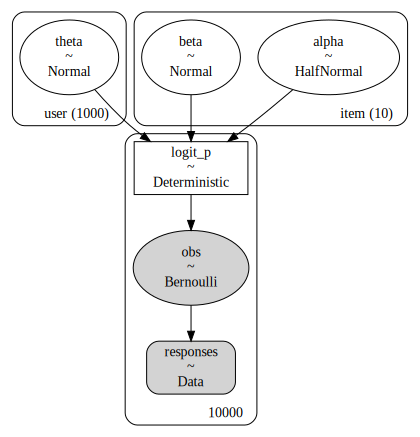

In [43]:
# indexと値の取得
user_idx, users = pd.factorize(df_long["user"])
item_idx, items = pd.factorize(df_long["item"])
responses = df_long["response"].to_numpy()

import pymc as pm
model = pm.Model(coords={"user": df.index, "item": df.columns})
with model:
    # 観測値の配列
    response_obs = pm.ConstantData("responses", responses)

    # 2PLM
    theta = pm.Normal("theta", mu=0.0, sigma=1.0, dims="user")
    alpha = pm.HalfNormal("alpha", sigma=1.0, dims="item")
    beta = pm.Normal("beta", mu=0.0, sigma=1.0, dims="item")
    logit_p = pm.Deterministic("logit_p", alpha[item_idx] * (theta[user_idx] - beta[item_idx]))

    # ベルヌーイ分布（pではなくlogit_pの引数に渡すことでシグモイド関数の計算をpymc側にまかせている）
    obs = pm.Bernoulli("obs", logit_p=logit_p, observed=response_obs)

g = pm.model_to_graphviz(model)
g

### 推定

In [44]:
%%time
with model:
    idata = pm.sample(random_seed=0)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, alpha, beta]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 53 seconds.


CPU times: user 13.2 s, sys: 928 ms, total: 14.1 s
Wall time: 1min 1s


In [45]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data

一部の項目の$\alpha_j, \beta_j$

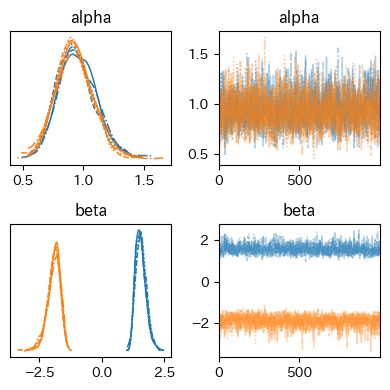

In [46]:
import arviz as az

query = {"item": ["question_1", "question_2"]}

az.plot_trace(idata, coords=query, var_names=["alpha", "beta"], figsize=[4, 4])
plt.tight_layout()
plt.show()

一部の回答者の$\theta_i$

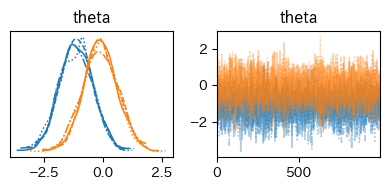

In [48]:
import arviz as az

query = {"user": ["user_1", "user_2"]}

az.plot_trace(idata, coords=query, var_names=["theta"], figsize=[4, 2])
plt.tight_layout()
plt.show()

## 参考

- [Chapter 8 項目反応理論 1](https://www2.kobe-u.ac.jp/~bunji/files/lecture/MVA/mva-08-item-response-theory.pdf)